In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md


In [2]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [3]:
df = pd.read_csv('./data/2 DONE RIGHT OUTPUT Songs with lyrics.csv')
df

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics,urls,fetched_url
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"['Jay-Z', 'Beyonce Knowles']",rock,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ...","[""https://genius.com/Jay-z-03-bonnie-and-clyde...",https://genius.com/Jay-z-03-bonnie-and-clyde-l...
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,['Paul Davis'],hip hop,’65 Love Affair LyricsI was a car hop\nYou wer...,"[""https://genius.com/Paul-davis-65-love-affair...",https://genius.com/Paul-davis-65-love-affair-l...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,['The Everly Brothers'],country,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...,"[""https://genius.com/The-everly-brothers-til-i...",https://genius.com/The-everly-brothers-til-i-k...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,['Nelson'],uncategorized,(Can’t Live Without Your) Love And Affection L...,"[""https://genius.com/Nelson-cant-live-without-...",https://genius.com/Nelson-cant-live-without-yo...
...,...,...,...,...,...,...,...,...,...,...
3897,abcdefuGAYLE,3,2021-12-04,abcdefu,GAYLE,['GAYLE'],hip hop,TranslationsTürkçeEspañolDeutschFrançais​abcde...,"[""https://genius.com/Gayle-abcdefu-lyrics"", ""h...",https://genius.com/Gayle-abcdefu-lyrics
3898,amariJ. Cole,5,2021-05-29,amari,J. Cole,['J. Cole'],NaN,"American Dream Lyrics[Intro: Jeezy]\n(Cryin', ...","[""https://genius.com/Jeezy-american-dream-lyri...",https://genius.com/Jeezy-american-dream-lyrics
3899,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"['KYLE', 'Lil Yachty']",pop,"I Spy, T Shirt, Isn’t She Lovely, & Swang Mash...","[""https://genius.com/Alex-aiono-i-spy-t-shirt-...",https://genius.com/Alex-aiono-i-spy-t-shirt-is...
3900,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],NaN,"Interlude (Cole World) LyricsI'm drivin', nigg...","[""https://genius.com/J-cole-interlude-cole-wor...",https://genius.com/J-cole-interlude-cole-world...


In [4]:
df[df.song.str.contains('Rolling in the Deep', case=False)].lyrics.iloc[0]

"TranslationsFrançaisEspañolPortuguêsΕλληνικάRolling in the Deep Lyrics[Verse 1]\nThere's a fire starting in my heart\nReaching a fever pitch and it's bringing me out the dark\nFinally, I can see you crystal clear\nGo ahead and sell me out and I'll lay your shit bare\nSee how I'll leave with every piece of you\nDon't underestimate the things that I will do\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\n\n[Pre-Chorus]\nThe scars of your love remind me of us\nThey keep me thinkin' that we almost had it all\nThe scars of your love, they leave me breathless\nI can't help feeling\n\n[Chorus]\nWe could've had it all (You're gonna wish you never had met me)\nRolling in the deep (Tears are gonna fall, rolling in the deep)\nYou had my heart inside of your hand (You're gonna wish you never had met me)\nAnd you played it to the beat (Tears are gonna fall, rolling in the deep)\n\n[Verse 2]\nBaby, I have no story to be told\nBut I've heard one on yo

# Explode data into *one row per line*

In [5]:
lyrics_split_df = df.copy()
lyrics_split_df['Parsed Lyrics'] = df.lyrics.apply(lambda l: l.split('\n'))

every_row_is_a_line_RAW = lyrics_split_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'song_id']
).drop(
    columns=['lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'}).reset_index()


In [6]:
every_row_is_a_line_RAW

,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,fetched_url,lyric_line
0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,#9 Dream Lyrics[Verse 1]
1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,So long ago
2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"Was it in a dream, was it just a dream?"
3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"I know, yes I know"
4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...,...,...,...,...
149992,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,"I see chicken, you niggas is breast to me"
149993,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,Planted a seed but it ain't a sesame
149994,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,Can't let you niggas or bitches grow next to me
149995,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,"[Chorus: Morray, J. Cole, Morray & J. Cole]"


### Filter & clean

In [7]:
# SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"
SONG_DASH_ARTIST = ' - '  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

# regex is easiest
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"


with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        ENDS_WITH_YEAR_IN_PAREN, 
        regex= True, case=False, na=False
    )
]

with_filters = with_filters[
    ~with_filters['lyric_line'].str.contains(
        SONG_DASH_ARTIST
    )
]


# remove if starts *or* ends with "[]": ~20k
# NOTE: I checked this fairly thoroughly, this condition signals a non-lyric
with_filters = with_filters[
        ~with_filters.lyric_line.str.startswith('[') &
        ~with_filters.lyric_line.str.endswith(']')
]


# all we need, not too many verses in these songs :P 
with_filters = with_filters[
        ~with_filters.lyric_line.str.contains('Verse 1') &
        ~with_filters.lyric_line.str.contains('Verse 2') &
        ~with_filters.lyric_line.str.contains('Verse 3') &
        ~with_filters.lyric_line.str.contains('Verse One') &
        ~with_filters.lyric_line.str.contains('Verse Two') &
        ~with_filters.lyric_line.str.contains('Verse Three')
]

In [8]:
with_more_filters = with_filters[
    ~with_filters.lyric_line.str.contains('" by ') &
    ~with_filters.lyric_line.str.contains('EmbedShare URLCopyEmbedCopy')
].reset_index()

In [9]:
MIN_CHAR_COUNT_FOR_A_LINE = 6

In [10]:
md(f'### note: we are just going to look at lyric lines of {MIN_CHAR_COUNT_FOR_A_LINE}+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)')

### note: we are just going to look at lyric lines of 6+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)

In [11]:
with_even_more_filters = with_more_filters[
    (with_more_filters.lyric_line.str.len() >= MIN_CHAR_COUNT_FOR_A_LINE)
]

# Dealing with non-lyrics returned from the API. For the prototype: just filter them out via *character length*. Long term TODO: replace them with the correct lyrics.


In [12]:
# Reasonable?
with_even_more_filters['lyric_line'].str.len().describe()

count    123170.000000
mean         34.794625
std          17.845829
min           6.000000
25%          24.000000
50%          33.000000
75%          43.000000
max         837.000000
Name: lyric_line, dtype: float64

In [13]:
# For context:
len("We could've had it all (tears are gonna fall, rolling in the deep)")

66

### Inspecting unusually long lyrics, they seem to be non-lyrics pretty consistently

In [14]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() > 140
]#.lyric_line.str.len().describe()

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,fetched_url,lyric_line
2204,2588,67,808Blaque,8,1999-04-17,808,Blaque,['Blaque'],NaN,"[""https://genius.com/Blaque-808-lyrics"", ""http...",https://genius.com/Blaque-808-lyrics,"(Alright? Nah) ""That will not be in the top 10..."
3972,4610,122,"Ahab, The ArabRay Stevens",5,1962-06-30,"Ahab, The Arab",Ray Stevens,['Ray Stevens'],pop,"[""https://genius.com/Ray-stevens-ahab-the-arab...",https://genius.com/Ray-stevens-ahab-the-arab-l...,Silently through the night to the sultan's ten...
3980,4618,122,"Ahab, The ArabRay Stevens",5,1962-06-30,"Ahab, The Arab",Ray Stevens,['Ray Stevens'],pop,"[""https://genius.com/Ray-stevens-ahab-the-arab...",https://genius.com/Ray-stevens-ahab-the-arab-l...,There she was friends lying there in all her r...
8203,9472,245,Baby Got BackSir Mix-A-Lot,1,1992-04-11,Baby Got Back,Sir Mix-A-Lot,['Sir Mix-A-Lot'],NaN,"[""https://genius.com/Sir-mix-a-lot-baby-got-ba...",https://genius.com/Sir-mix-a-lot-baby-got-back...,"""Oh, my, god, Becky, look at her butt. It is s..."
9354,10745,276,"Bad Boys (Theme From ""Cops"")Inner Circle",8,1993-05-01,"Bad Boys (Theme From ""Cops"")",Inner Circle,['Inner Circle'],country,"[""https://genius.com/Xtorinx-8-cop-drama-skit-...",https://genius.com/Xtorinx-8-cop-drama-skit-an...,"Uh, we have reason to believe that this is the..."
...,...,...,...,...,...,...,...,...,...,...,...,...
121022,142090,3678,Where Is The Love?The Black Eyed Peas,8,2003-06-14,Where Is The Love?,The Black Eyed Peas,['The Black Eyed Peas'],rock,"[""https://genius.com/Mr-petrucci-how-to-write-...",https://genius.com/Mr-petrucci-how-to-write-an...,Think about what this saying means for you. Wr...
121023,142091,3678,Where Is The Love?The Black Eyed Peas,8,2003-06-14,Where Is The Love?,The Black Eyed Peas,['The Black Eyed Peas'],rock,"[""https://genius.com/Mr-petrucci-how-to-write-...",https://genius.com/Mr-petrucci-how-to-write-an...,You have 60 minutes to complete the task. You ...
127778,149916,3900,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],NaN,"[""https://genius.com/J-cole-interlude-cole-wor...",https://genius.com/J-cole-interlude-cole-world...,"Interlude (Cole World) LyricsI'm drivin', nigg..."
127781,149919,3900,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],NaN,"[""https://genius.com/J-cole-interlude-cole-wor...",https://genius.com/J-cole-interlude-cole-world...,"So I'm like ""Fuck"" I knew right away what it w..."


<AxesSubplot:>

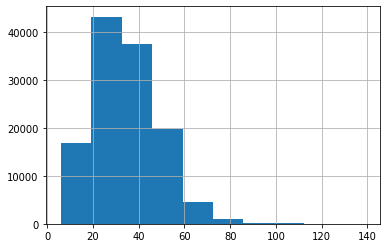

In [15]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 140
].lyric_line.str.len().hist()

## Ok, so just filter out long lines

In [16]:
with_long_lyrics_removed = with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 140
]
with_long_lyrics_removed

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,fetched_url,lyric_line
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,So long ago
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"Was it in a dream, was it just a dream?"
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"I know, yes I know"
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"Seemed so very real, it seemed so real to me"
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,Took a walk down the street
...,...,...,...,...,...,...,...,...,...,...,...,...
127849,149991,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,"I get to answerin', you get to testin' me"
127850,149992,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,"I see chicken, you niggas is breast to me"
127851,149993,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,Planted a seed but it ain't a sesame
127852,149994,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,Can't let you niggas or bitches grow next to me


### (so we don't have to re-name stuff as we do updates)

In [17]:
filtering_done = with_long_lyrics_removed

# Add a numeric date column (for fast filtering), eg `1974-01-01` becomes something like `1974.0`

In [18]:
date_column_cast_to_datetime = pd.to_datetime(filtering_done['chart_debut'])
date_column_cast_to_datetime

0        1974-12-21
1        1974-12-21
2        1974-12-21
3        1974-12-21
5        1974-12-21
            ...    
127849   2021-05-29
127850   2021-05-29
127851   2021-05-29
127852   2021-05-29
127853   2021-05-29
Name: chart_debut, Length: 123052, dtype: datetime64[ns]

In [19]:
day_as_a_percentage = pd.to_numeric(date_column_cast_to_datetime.dt.dayofyear) / 366 # for leap years. it's ok to be a little sloppy


In [20]:
year_int = pd.to_datetime(filtering_done['chart_debut']).dt.strftime('%Y').astype(int)
year_int

0         1974
1         1974
2         1974
3         1974
5         1974
          ... 
127849    2021
127850    2021
127851    2021
127852    2021
127853    2021
Name: chart_debut, Length: 123052, dtype: int64

In [21]:
date_col_done = filtering_done.copy()
date_col_done['chart_debut_date_as_a_decimal'] = round(year_int + day_as_a_percentage, 2)
date_col_done

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,urls,fetched_url,lyric_line,chart_debut_date_as_a_decimal
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,So long ago,1974.97
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"Was it in a dream, was it just a dream?",1974.97
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"I know, yes I know",1974.97
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,"Seemed so very real, it seemed so real to me",1974.97
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],uncategorized,"[""https://genius.com/John-lennon-9-dream-lyric...",https://genius.com/John-lennon-9-dream-lyrics,Took a walk down the street,1974.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127849,149991,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,"I get to answerin', you get to testin' me",2021.41
127850,149992,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,"I see chicken, you niggas is breast to me",2021.41
127851,149993,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,Planted a seed but it ain't a sesame,2021.41
127852,149994,3901,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",NaN,"[""https://genius.com/J-cole-21-savage-and-morr...",https://genius.com/J-cole-21-savage-and-morray...,Can't let you niggas or bitches grow next to me,2021.41


# NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [26]:
COLUMNS_FOR_VIZ = ['performer', 'song', 'generic_genre', 'lyric_line', 'chart_debut', 'chart_debut_date_as_a_decimal']

lyric_lines_ready_for_analysis = (
    date_col_done[
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val and val.replace('â\x80\x99', "'")
)
lyric_lines_ready_for_analysis

,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,John Lennon,#9 Dream,uncategorized,So long ago,1974-12-21,1974.97
1,John Lennon,#9 Dream,uncategorized,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,John Lennon,#9 Dream,uncategorized,"I know, yes I know",1974-12-21,1974.97
3,John Lennon,#9 Dream,uncategorized,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,John Lennon,#9 Dream,uncategorized,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...
104461,KYLE Featuring Lil Yachty,iSpy,pop,"Know some young hittas like to (swang), swang,...",2017-01-14,2017.04
104462,KYLE Featuring Lil Yachty,iSpy,pop,Know some young hittas like to swa-a-a-ang,2017-01-14,2017.04
104463,KYLE Featuring Lil Yachty,iSpy,pop,"(Hopped out, drop, top, what y'all talkin' I n...",2017-01-14,2017.04
104464,KYLE Featuring Lil Yachty,iSpy,pop,"Cash in the air, yeah, what goes up gotta come...",2017-01-14,2017.04


### Lyric lines by year (sanity check)

In [27]:
lyric_lines_ready_for_analysis

,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,John Lennon,#9 Dream,uncategorized,So long ago,1974-12-21,1974.97
1,John Lennon,#9 Dream,uncategorized,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,John Lennon,#9 Dream,uncategorized,"I know, yes I know",1974-12-21,1974.97
3,John Lennon,#9 Dream,uncategorized,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,John Lennon,#9 Dream,uncategorized,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...
104461,KYLE Featuring Lil Yachty,iSpy,pop,"Know some young hittas like to (swang), swang,...",2017-01-14,2017.04
104462,KYLE Featuring Lil Yachty,iSpy,pop,Know some young hittas like to swa-a-a-ang,2017-01-14,2017.04
104463,KYLE Featuring Lil Yachty,iSpy,pop,"(Hopped out, drop, top, what y'all talkin' I n...",2017-01-14,2017.04
104464,KYLE Featuring Lil Yachty,iSpy,pop,"Cash in the air, yeah, what goes up gotta come...",2017-01-14,2017.04


<AxesSubplot:>

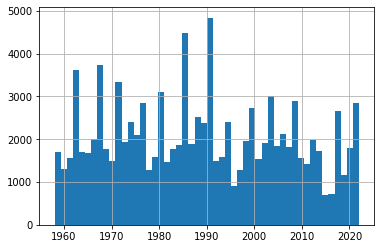

In [28]:
lyric_lines_ready_for_analysis.chart_debut.apply(lambda d: int(d[:4])).hist(bins=50)

In [29]:
lyric_lines_ready_for_analysis.to_csv('./data/3 DONE RIGHT OUTPUT One lyric lines per row, cleaned.csv', index=False)